##### Import  Libraries

In [2]:
# Import packages

import pandas as pd
import numpy as np
import random

#notebook reproducible 
np.random.seed(42)
random.seed(42)

# preprocessing and feature engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller, acf, pacf


# modeling
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from sklearn.model_selection import train_test_split

# visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from pandas_profiling import ProfileReport
from pylab import rcParams
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22, 10

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../Scripts')))
from plotting import Plotting
from preprocessing import Preprocess
from file import Myfile

In [13]:
preprocess = Preprocess()
plot = Plotting()
file = Myfile()

###### Load Data

In [14]:
train_df = pd.read_csv('../data/train_processed.csv', parse_dates=['Date'])

C:\Users\user\AppData\Local\Temp\ipykernel_3660\990550703.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../data/train_processed.csv', parse_dates=['Date'])


In [23]:
train_df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(f"The dataset contains {len(train_df)} Sales Data")
pd.set_option('display.max_columns', len(train_df.columns)) # To view all columns , , index_col='Date'
pd.set_option('display.max_rows', 100)

In [5]:
train_df.head(3)

The dataset contains 484398 Sales Data


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,weekday,weekofyear,weekend,PromoInterval,Assortment,StoreType
0,2015-07-31,1,4,5263.0,1,1.0,0,1.0,1270.0,9.0,2008.0,0.0,22.0,2012.0,2015.0,7.0,31.0,4.0,31.0,0.0,1.0,0.0,2.0
1,2015-07-31,2,4,6064.0,1,1.0,0,1.0,570.0,11.0,2007.0,1.0,13.0,2010.0,2015.0,7.0,31.0,4.0,31.0,0.0,1.0,0.0,0.0
2,2015-07-31,3,4,8314.0,1,1.0,0,1.0,14130.0,12.0,2006.0,1.0,14.0,2011.0,2015.0,7.0,31.0,4.0,31.0,0.0,1.0,0.0,0.0


Null values check

In [ ]:
train_df.isna().sum()

Date                         0
Store                        0
DayOfWeek                    0
Sales                        0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       1
Promo2SinceWeek              1
Promo2SinceYear              1
Year                         1
Month                        1
Day                          1
weekday                      1
weekofyear                   1
weekend                      1
PromoInterval                1
Assortment                   1
StoreType                    1
dtype: int64

Sort the dataframe by date on ascending order

In [4]:
train_df = train_df.set_index(['Date'])

In [6]:
train_df.sort_values(by='Date', ascending = True, inplace=True)
 train_df.head()

,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,weekday,weekofyear,weekend,PromoInterval,Assortment,StoreType
484397,2014-04-23,158,2,7284.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484295,2014-04-23,56,2,4665.0,1,0.0,0,1.0,6620.0,3.0,2012.0,1.0,10.0,2014.0,2014.0,4.0,23.0,2.0,17.0,0.0,2.0,2.0,3.0
484294,2014-04-23,55,2,3997.0,1,0.0,0,1.0,720.0,11.0,2004.0,0.0,22.0,2012.0,2014.0,4.0,23.0,2.0,17.0,0.0,1.0,0.0,0.0
484293,2014-04-23,54,2,5119.0,1,0.0,0,0.0,7170.0,8.0,2014.0,1.0,5.0,2013.0,2014.0,4.0,23.0,2.0,17.0,0.0,0.0,2.0,3.0
484292,2014-04-23,53,2,4025.0,1,0.0,0,1.0,30360.0,9.0,2013.0,0.0,22.0,2012.0,2014.0,4.0,23.0,2.0,17.0,0.0,1.0,2.0,0.0


Pairwise correlation

In [7]:
train_df2 = train_df[['Date', 'Sales']]
train_df2.head()

,Date,Sales
484397,2014-04-23,7284.0
484295,2014-04-23,4665.0
484294,2014-04-23,3997.0
484293,2014-04-23,5119.0
484292,2014-04-23,4025.0


In [8]:
train_df2.Date = pd.to_datetime(train_df2.Date)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832492 entries, 832491 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    832492 non-null  datetime64[ns]
 1   Sales   832492 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.1 MB


In [ ]:
train_df2 = train_df2[train_df2['Sales'] > 0.0]

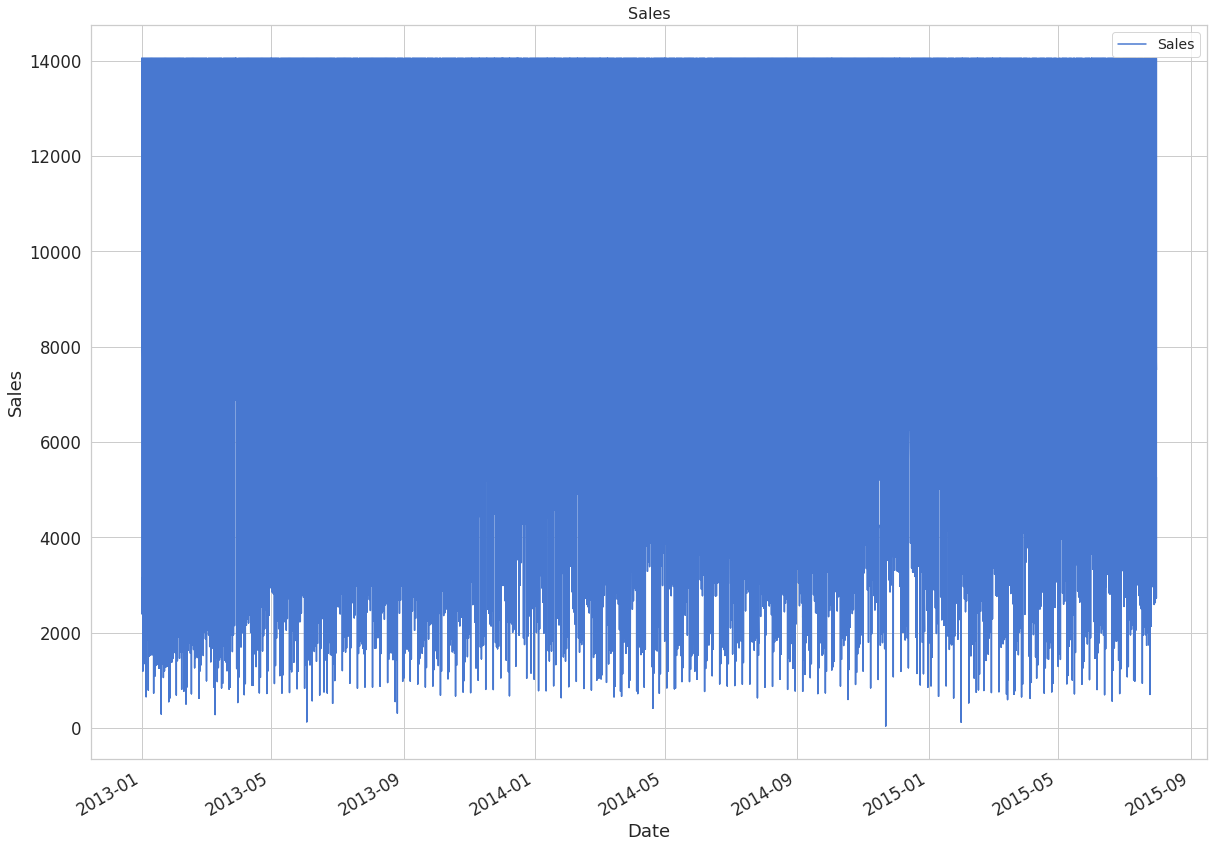

In [ ]:
import matplotlib.pyplot as plt
train_df.plot(x='Date', figsize=(20, 15))
plt.ylabel("Sales")
plt.title("Sales", fontsize=16)
plt.legend(fontsize=14);
plt.show()

In [9]:
train_size = int(len(train_df2) * 0.70)
test_size = len(train_df2) - train_size
train, testt = train_df2.iloc[0:train_size], train_df2.iloc[train_size:len(train_df2)]
print(train.shape, testt.shape)

(339078, 2) (145320, 2)


In [10]:
test_size = int(len(testt) * 0.50)
val_size = len(testt) - test_size
test, val = testt.iloc[0:test_size], testt.iloc[test_size:len(testt)]
print(val.shape, test.shape)

(72660, 2) (72660, 2)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(train[['Sales']])

train['Sales'] = scaler.transform(train[['Sales']])
test['Sales'] = scaler.transform(test[['Sales']])
val['Sales'] = scaler.transform(val[['Sales']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [17]:
TIME_STEPS=30

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])
    
    return np.array(Xs), np.array(ys)

In [18]:
X_train, y_train = create_sequences(train[['Sales']], train['Sales'])
X_test, y_test = create_sequences(test[['Sales']], test['Sales'])
X_val, y_val = create_sequences(val[['Sales']], val['Sales'])

In [12]:
print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')
print(f'Testing shape: {X_val.shape}')

print(f'Testing shape: {y_train.shape}')
print(f'Testing shape: {y_test.shape}')
print(f'Testing shape: {y_val.shape}')

Training shape: (339048, 30, 1)
Testing shape: (72630, 30, 1)
Testing shape: (72630, 30, 1)
Testing shape: (339048,)
Testing shape: (72630,)
Testing shape: (72630,)


In [13]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))

model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, return_sequences=True))

model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=1e-08, decay=0.01), loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 30, 128)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 time_distributed (TimeDistr  (None, 30, 1)            129       
 ibuted)                                                

In [14]:
report = model.fit(X_train, y_train, epochs=10, batch_size=60, validation_data=(X_val, y_val),
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)

Epoch 1/10
5651/5651 [==============================] - 58s 8ms/step - loss: 0.4786 - val_loss: 0.4738
Epoch 2/10
5651/5651 [==============================] - 50s 9ms/step - loss: 0.4721 - val_loss: 0.4720
Epoch 3/10
5651/5651 [==============================] - 49s 9ms/step - loss: 0.4705 - val_loss: 0.4712
Epoch 4/10
5651/5651 [==============================] - 49s 9ms/step - loss: 0.4697 - val_loss: 0.4707
Epoch 5/10
5651/5651 [==============================] - 47s 8ms/step - loss: 0.4691 - val_loss: 0.4703
Epoch 6/10
5651/5651 [==============================] - 49s 9ms/step - loss: 0.4687 - val_loss: 0.4700
Epoch 7/10
5651/5651 [==============================] - 47s 8ms/step - loss: 0.4683 - val_loss: 0.4698
Epoch 8/10
5651/5651 [==============================] - 47s 8ms/step - loss: 0.4680 - val_loss: 0.4696
Epoch 9/10
5651/5651 [==============================] - 47s 8ms/step - loss: 0.4678 - val_loss: 0.4694
Epoch 10/10
5651/5651 [==============================] - 47s 8ms/step - l

###### Plotting

In [18]:
plt.plot(repoer.repoer['loss'], label='train')
plt.plot(repoer.repoer['val_loss'], label='val')
plt.legend()
plt.show()

In [19]:
X_test_pred = model.predict(X_test)

test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

#####  Model Evaluation

In [20]:
model.evaluate(X_test, y_test)

2270/2270 [==============================] - 9s 4ms/step - loss: 0.4344


0.43436479568481445

In [21]:
X_train_pred = model.predict(X_train)

train_mae_loss = pd.DataFrame(np.mean(np.abs(X_train_pred - X_train), axis=1), columns=['Error'])
train_mae_loss

,Error
0,0.299572
1,0.296168
2,0.294316
3,0.296222
4,0.328173
...,...
339043,0.407679
339044,0.392160
339045,0.400189
339046,0.356654


In [23]:
sns.distplot(train_mae_loss, bins=50, kde=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [24]:
X_test_pred = model.predict(X_test)

test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

In [25]:
sns.distplot(test_mae_loss, bins=50, kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [27]:
THRESHOLD = 0.65

score_df = pd.DataFrame(index=test[TIME_STEPS:].index)
score_df['loss'] = test_mae_loss
score_df['threshold'] = THRESHOLD
score_df['anomaly'] = score_df.loss > score_df.threshold
score_df['Sales'] = test[TIME_STEPS:].Sales

In [28]:
score_df

,loss,threshold,anomaly,Sales
145952,0.383803,0.65,False,0.026841
145951,0.371426,0.65,False,0.025186
145950,0.363430,0.65,False,-0.285155
145949,0.333316,0.65,False,0.284769
145948,0.326345,0.65,False,0.377181
...,...,...,...,...
73310,0.446821,0.65,False,0.080358
73033,0.436316,0.65,False,0.006152
73034,0.427787,0.65,False,1.612751
73035,0.476374,0.65,False,0.050841


In [30]:
plt.plot(score_df.index, score_df.loss, label='loss')
plt.plot(score_df.index, score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend()
plt.show()

##### Preprocessing

In [ ]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day', 'weekday', 'weekofyear',
       'weekend', 'PromoInterval', 'Assortment', 'StoreType'],
      dtype='object')

In [ ]:
# Drop Year columns
train_df = train_df.drop(['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day', 'weekday', 'weekofyear',
       'weekend', 'PromoInterval', 'Assortment', 'StoreType'], axis = 1)
train_df

,Sales
Date,
2013-01-01,0.0
2013-01-01,0.0
2013-01-01,0.0
2013-01-01,0.0
2013-01-01,0.0
...,...
2015-07-31,9082.0
2015-07-31,10708.0
2015-07-31,7481.0


In [ ]:
train_df = train_df[train_df['Sales'] > 0.0]

In [ ]:
drop_cols = ['CompetitionOpenSinceYear', 'Promo2SinceYear', ]
train_df.drop(drop_cols, axis=1, inplace=True)
train_df

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,Promo2,Promo2SinceWeek,Year,Month,Day,weekday,weekofyear,weekend,PromoInterval,Assortment,StoreType
Date,,,,,,,,,,,,,,,,,,,,
2014-12-06,581,5,3707.0,1,0,0,0,7250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-06,194,5,5028.0,1,0,0,0,16970.0,8.0,1.0,5.0,2014.0,12.0,6.0,5.0,49.0,1.0,0.0,2.0,3.0
2014-12-06,195,5,12342.0,1,0,0,0,220.0,8.0,0.0,22.0,2014.0,12.0,6.0,5.0,49.0,1.0,1.0,2.0,0.0
2014-12-06,196,5,4507.0,1,0,0,0,3850.0,11.0,1.0,14.0,2014.0,12.0,6.0,5.0,49.0,1.0,1.0,0.0,2.0
2014-12-06,197,5,7003.0,1,0,0,0,4210.0,3.0,0.0,22.0,2014.0,12.0,6.0,5.0,49.0,1.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-31,746,4,9082.0,1,1,0,1,4330.0,2.0,1.0,35.0,2015.0,7.0,31.0,4.0,31.0,0.0,2.0,2.0,3.0
2015-07-31,747,4,10708.0,1,1,0,1,45740.0,8.0,0.0,22.0,2015.0,7.0,31.0,4.0,31.0,0.0,1.0,2.0,2.0
2015-07-31,748,4,7481.0,1,1,0,1,2380.0,3.0,1.0,14.0,2015.0,7.0,31.0,4.0,31.0,0.0,1.0,0.0,3.0


In [ ]:
train_df.drop('Year', axis=1, inplace=True)

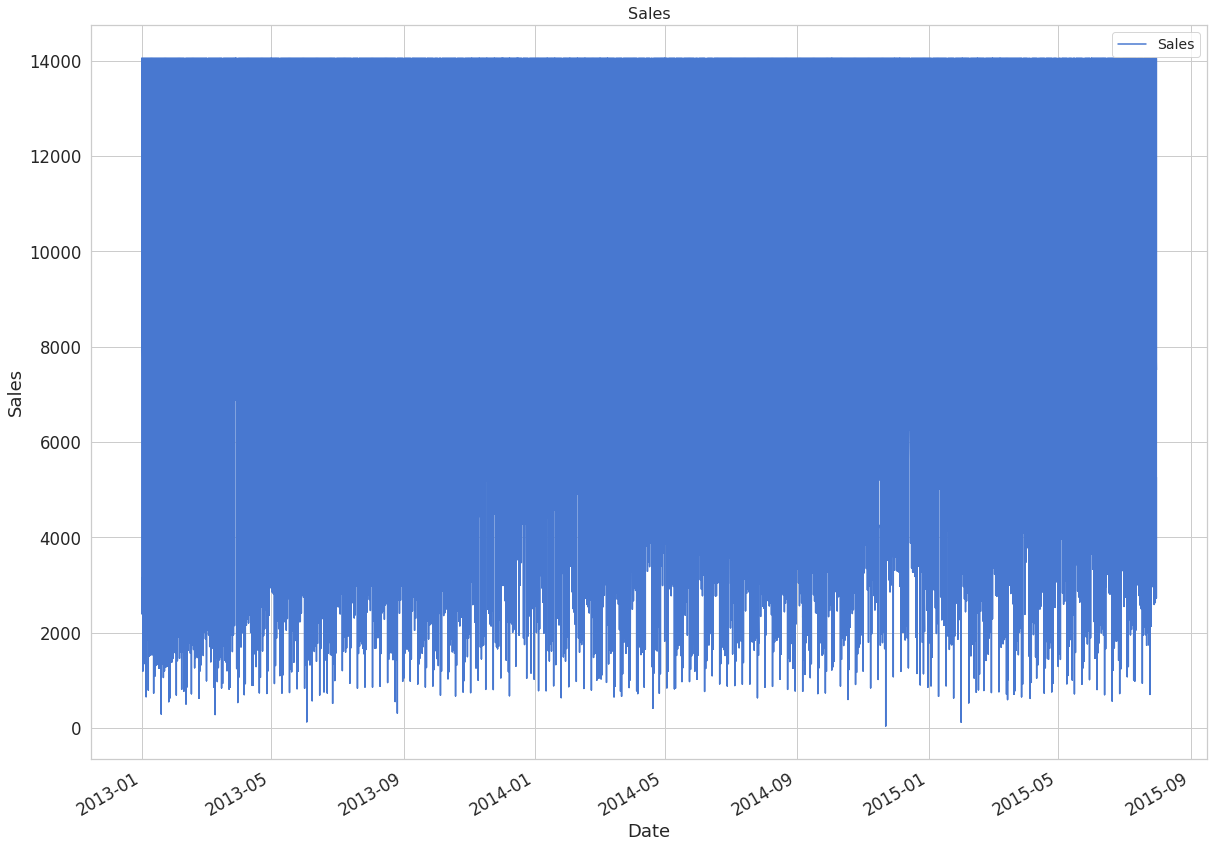

In [ ]:
import matplotlib.pyplot as plt
train_df.plot(x='Date', figsize=(20, 15))
plt.ylabel("Sales")
plt.title("Sales", fontsize=16)
plt.legend(fontsize=14);
plt.show()

In [ ]:
train_df.isna().sum()

Date                         0
Store                        0
DayOfWeek                    0
Sales                        0
Open                         0
Promo                        0
SchoolHoliday                0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
Promo2                       0
Promo2SinceWeek              0
Month                        0
Day                          0
weekday                      0
weekofyear                   0
weekend                      0
PromoInterval                0
Assortment                   0
StoreType                    0
dtype: int64

###### Data Splitting

In [ ]:
train_size = int(len(train_df) * 0.70)
test_size = len(train_df) - train_size
train, testt = train_df.iloc[0:train_size], train_df.iloc[train_size:len(df)]
print(train.shape, testt.shape)

(182169, 18) (78073, 18)


In [ ]:
test_size = int(len(testt) * 0.50)
val_size = len(testt) - test_size
test, val = testt.iloc[0:test_size], testt.iloc[test_size:len(testt)]
print(val.shape, test.shape)

(39037, 18) (39036, 18)


In [ ]:
drop_cols = ['CompetitionOpenSinceYear', 'Promo2SinceYear', 'Year', 'StateHoliday']
train.drop(drop_cols, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_df.drop('StateHoliday', axis=1, inplace=True)

In [ ]:
train


,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,Promo2,Promo2SinceWeek,Month,Day,weekday,weekofyear,weekend,PromoInterval,Assortment,StoreType
Date,,,,,,,,,,,,,,,,,,
2014-12-06,581,5,3707.0,1,0,0,7250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-06,194,5,5028.0,1,0,0,16970.0,8.0,1.0,5.0,12.0,6.0,5.0,49.0,1.0,0.0,2.0,3.0
2014-12-06,195,5,12342.0,1,0,0,220.0,8.0,0.0,22.0,12.0,6.0,5.0,49.0,1.0,1.0,2.0,0.0
2014-12-06,196,5,4507.0,1,0,0,3850.0,11.0,1.0,14.0,12.0,6.0,5.0,49.0,1.0,1.0,0.0,2.0
2014-12-06,197,5,7003.0,1,0,0,4210.0,3.0,0.0,22.0,12.0,6.0,5.0,49.0,1.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-22,755,4,11756.0,1,1,0,13130.0,12.0,0.0,22.0,5.0,22.0,4.0,21.0,0.0,1.0,2.0,3.0
2015-05-22,756,4,14049.5,1,1,0,50.0,8.0,1.0,40.0,5.0,22.0,4.0,21.0,0.0,1.0,2.0,0.0
2015-05-22,750,4,5241.0,1,1,0,8670.0,2.0,1.0,14.0,5.0,22.0,4.0,21.0,0.0,1.0,0.0,3.0


In [ ]:
train.dtypes

Store                        float64
DayOfWeek                      int64
Sales                        float64
Open                           int64
Promo                          int64
SchoolHoliday                  int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
Promo2                         int64
Promo2SinceWeek              float64
Month                          int64
Day                            int64
weekday                        int64
weekofyear                     int64
weekend                        int64
PromoInterval                  int64
Assortment                     int64
StoreType                      int64
dtype: object

###### Scale the Data

In [ ]:
cols = ['Sales', 'Store', 'CompetitionDistance', 'Promo2SinceWeek']

for col in cols:
  scaler = StandardScaler()
  scaler = scaler.fit(train[[col]])

  train[col] = scaler.transform(train[[col]])
  test[col] = scaler.transform(test[[col]])
  val[col] = scaler.transform(val[[col]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [19]:
TIME_STEPS=30

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])
    
    return np.array(Xs), np.array(ys)

In [20]:
X_train, y_train = create_sequences(train[['Sales']], train['Sales'])
X_test, y_test = create_sequences(test[['Sales']], test['Sales'])
X_val, y_val = create_sequences(val[['Sales']], val['Sales'])

In [ ]:
print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')
print(f'Testing shape: {X_val.shape}')

print(f'Testing shape: {y_train.shape}')
print(f'Testing shape: {y_test.shape}')
print(f'Testing shape: {y_val.shape}')

Training shape: (591006, 30, 1)
Testing shape: (126621, 30, 1)
Testing shape: (126621, 30, 1)
Testing shape: (591006,)
Testing shape: (126621,)
Testing shape: (126621,)


In [ ]:
train.shape

(591036, 18)

In [ ]:
train_y = train['Sales']
test_y = test['Sales']
val_y = val['Sales']

train_x = train.drop('Sales', axis=1)
test_x = test.drop('Sales', axis=1)
val_x = val.drop('Sales', axis=1)

###### LSTM Autoencoder

In [ ]:
train.shape

(182169, 18)

In [ ]:
train_x.shape

(182169, 17)

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(train_x.shape[1], 1)))
model.add(Dropout(rate=0.2))

model.add(RepeatVector(train_x.shape[1]))
model.add(LSTM(128, return_sequences=True))

model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(1)))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=1e-08, decay=0.01), loss='mae')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 repeat_vector_2 (RepeatVect  (None, 17, 128)          0         
 or)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 17, 128)           131584    
                                                                 
 dropout_5 (Dropout)         (None, 17, 128)           0         
                                                                 
 time_distributed_2 (TimeDis  (None, 17, 1)            129       
 tributed)                                            

###### Train Autoencoder

In [ ]:
val_x.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,Promo2,Promo2SinceWeek,Month,Day,weekday,weekofyear,weekend,PromoInterval,Assortment,StoreType
Date,,,,,,,,,,,,,,,,,
2015-06-26,738,4,1,0,0,5980.0,10.0,0.0,22.0,6.0,26.0,4.0,26.0,0.0,1.0,2.0,3.0
2015-06-26,739,4,1,0,0,2770.0,6.0,1.0,22.0,6.0,26.0,4.0,26.0,0.0,1.0,2.0,3.0
2015-06-26,740,4,1,0,0,6400.0,3.0,0.0,22.0,6.0,26.0,4.0,26.0,0.0,1.0,0.0,3.0
2015-06-26,741,4,1,0,0,11900.0,8.0,0.0,22.0,6.0,26.0,4.0,26.0,0.0,1.0,2.0,3.0
2015-06-26,736,4,1,0,0,1650.0,8.0,1.0,14.0,6.0,26.0,4.0,26.0,0.0,1.0,2.0,2.0


In [ ]:
train_x = np.asarray(train_x).astype(np.float32)
train_y = np.asarray(train_y).astype(np.float32)
val_x = np.asarray(val_x).astype(np.float32)
val_y = np.asarray(val_y).astype(np.float32)

In [ ]:
report = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_data=(val_x, val_y),
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)

Epoch 1/100
5693/5693 [==============================] - 194s 34ms/step - loss: nan - val_loss: nan
Epoch 2/100
5693/5693 [==============================] - 188s 33ms/step - loss: nan - val_loss: nan
Epoch 3/100
5693/5693 [==============================] - 187s 33ms/step - loss: nan - val_loss: nan


In [ ]:
train_df.drop(['StateHoliday'], axis=1, inplace=True)

In [ ]:
adfResult = adfuller(train_df.Sales.values, autolag='AIC')
print(f'ADF Statistic: {adfResult[0]}')
print(f'p-value: {adfResult[1]}')

###### Data Splitting

In [ ]:
train_size = int(len(df) * 0.70)
test_size = len(train_df) - train_size
train, testt = train_df.iloc[0:train_size], train_df.iloc[train_size:len(train_df)]
print(train.shape, testt.shape)

(299676, 22) (128433, 22)


In [ ]:
test_size = int(len(testt) * 0.50)
val_size = len(testt) - test_size
test, val = testt.iloc[0:test_size], testt.iloc[test_size:len(testt)]
print(val.shape, test.shape)

(64217, 22) (64216, 22)


###### Scale the Data

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(train[['Sales']])

train['Close'] = scaler.transform(train[['Sales']])
test['Close'] = scaler.transform(test[['Sales']])
val['Close'] = scaler.transform(val[['Sales']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [21]:
TIME_STEPS=30

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])
    
    return np.array(Xs), np.array(ys)

In [22]:
X_train, y_train = create_sequences(train[['Sales']], train['Sales'])
X_test, y_test = create_sequences(test[['Sales']], test['Sales'])
X_val, y_val = create_sequences(val[['Sales']], val['Sales'])

In [ ]:
print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')
print(f'Testing shape: {X_val.shape}')

print(f'Testing shape: {y_train.shape}')
print(f'Testing shape: {y_test.shape}')
print(f'Testing shape: {y_val.shape}')

Training shape: (299646, 30, 1)
Testing shape: (64186, 30, 1)
Testing shape: (64187, 30, 1)
Testing shape: (299646,)
Testing shape: (64186,)
Testing shape: (64187,)


###### LSTM Autoencode

In [ ]:
y_train.shape

(299646,)

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))

model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, return_sequences=True))

model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=1e-08, decay=0.01), loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 30, 128)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 time_distributed (TimeDistr  (None, 30, 1)            129       
 ibuted)                                                

In [ ]:
report = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.15,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)